# 신경망 학습 Recap
[**3B1B: Gradient descent, how neural networks learn**](https://www.youtube.com/watch?v=IHZwWFHWa-w)
목표: **Cost**(함수값)가 최소가 되는 **가중치, 편향**(입력값)을 찾기.
방법: 경사하강법 사용
$$w_{new} = w_{old} - \eta \cdot \nabla C$$

현재 위치($w_{old}$)에서 경사($\nabla C$)를 타고 조금씩($\eta$) 이동하여 더 좋은 위치($w_{new}$)로 간다.

$\nabla C$를 어떻게 계산함?

## 학습 사이클
### Step 1. Forward Propagation
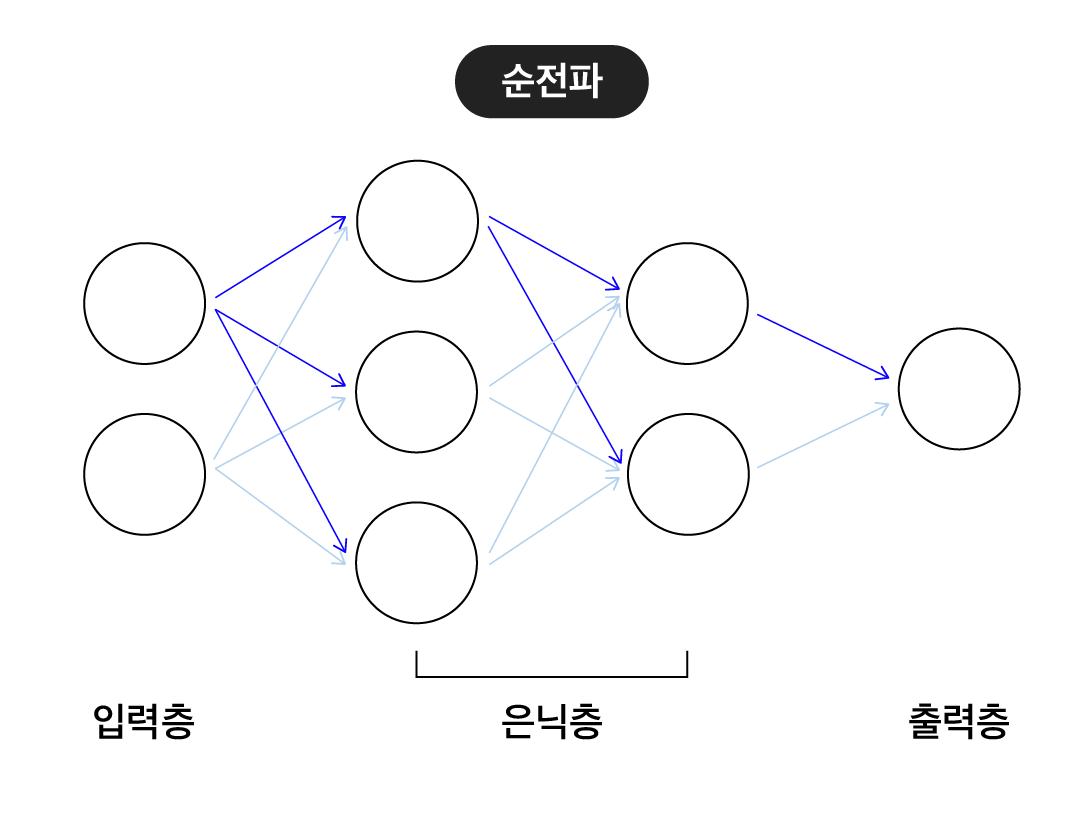

- 방향: 입력층 $\rightarrow$ 은닉층 $\rightarrow$ 출력층  
- 내용: 현재의 가중치와 편향을 사용하여 입력 데이터에 대한 예측값($\hat{y}$)을 계산.  

### Step 2. Loss 계산
- 내용: 예측값($\hat{y}$)과 실제 정답($y$)의 차이를 계산하여 **Cost**를 구함.

#### 인공지능의 겨울 (AI Winter)
1. SLP
   - 입력층과 출력층이 바로 연결된 단순한 구조.
   - 구조가 단순해 미분이 쉽고, 경사하강법을 통한 가중치/편향 업데이트가 쉬움.
   - 한계: XOR 문제와 같은 단순한 비선형 문제조차 풀 수 없음이 증명됨 (Minsky & Papert, 1969).
2. 시도: MLP 도입
   - 아이디어: 퍼셉트론을 여러 층 쌓으면 비선형 문제를 해결할 수 있다
   - 문제: 층이 깊어지면서 출력층에서 발생한 오차를 은닉층의 수많은 가중치들에게 어떻게 배분해야 할지 알 수 없었음.
     - 출력층의 오차를 입력 쪽으로 전달하며 각 층의 미분값($\nabla C$)을 계산할 수학적 방법이 정립되지 않음.
3. 결과: 연구 중단
   - 경사하강법이라는 도구는 있었으나, 이를 실행하기 위한 은닉층의 미분값을 구할 수 없었음.
   - 이 문제를 해결하지 못해 인공지능 연구는 약 20년 동안 암흑기를 맞이함.

##### 해결: 1986년, 제프리 힌튼 등이 **역전파**를 통해 이 문제를 해결


### Step 3. Backpropagation
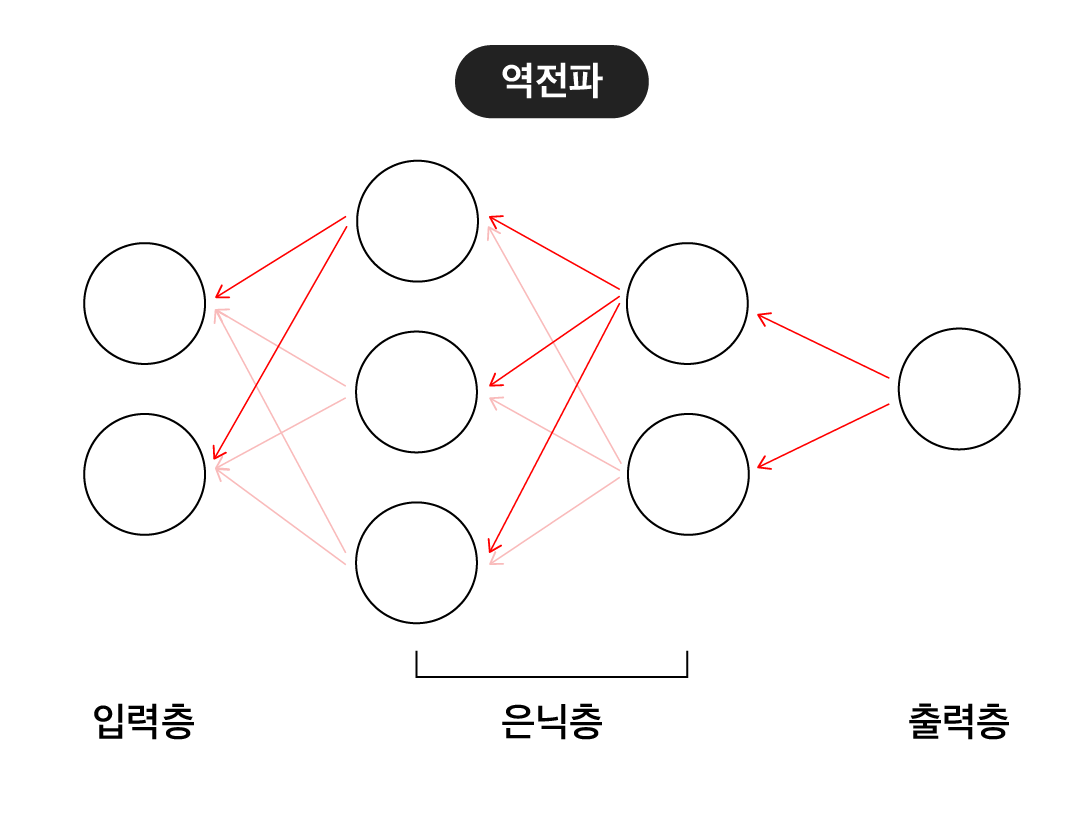

- 방향: 출력층 $\rightarrow$ 은닉층 $\rightarrow$ 입력층
- 내용: 계산된 오차를 줄이기 위해 **각 가중치가 오차에 얼마나 기여했는지**($\nabla C$)를 역순으로 계산. 

### Step 4. 가중치 업데이트
- Step 3에서 구한 기울기($\nabla C$)를 경사하강법 공식에 대입하여 실제 가중치를 수정.
- 이때 계산에 사용되는 가중치는 항상 업데이트 전 가중치임.
- 업데이트 과정 중 수정된 가중치를 사용하면 안됨. 

---

# Backpropagation

